In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
import datetime as dt
start = dt.datetime(2010,1,1)
end = dt.datetime(2019,12,31)

df= yf.download('AAPL',start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487532,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498749,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [3]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487532,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498749,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [4]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


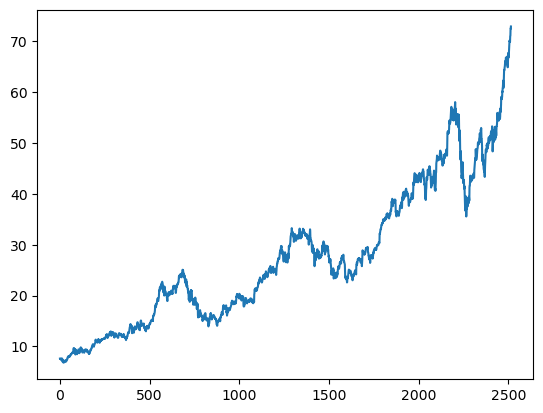

In [5]:
plt.plot(df.Close)

In [6]:
ma100= df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

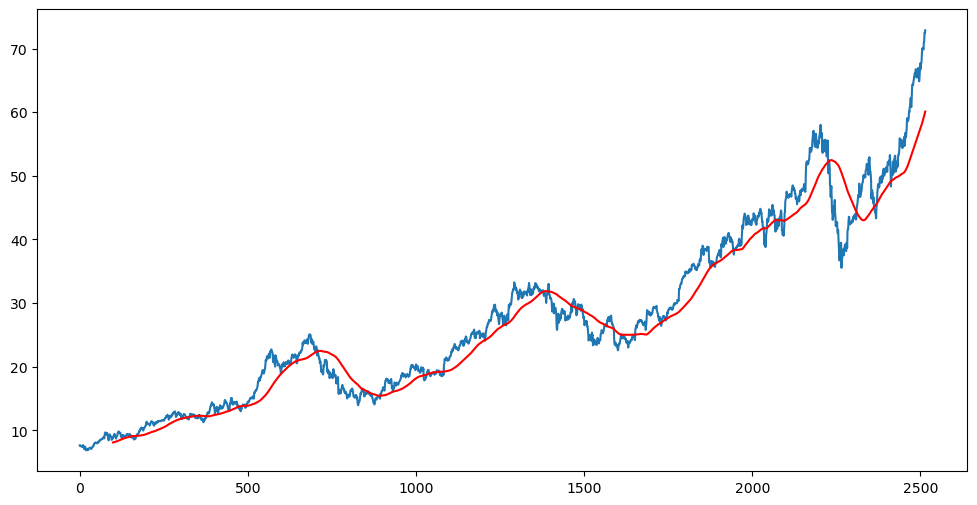

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [8]:
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

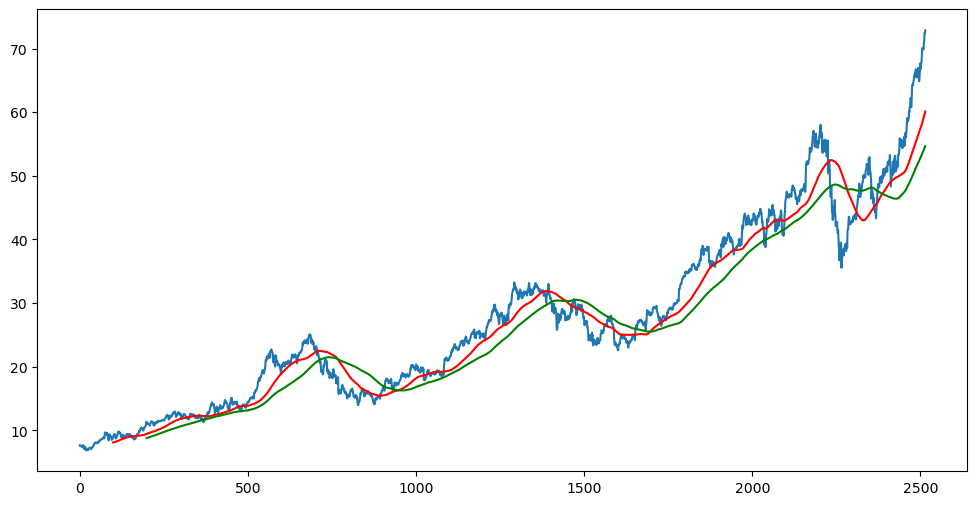

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [10]:
#Splitting data into training and testing

data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): ])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [12]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [13]:
x_train=[]
y_train=[]

for i  in range(100, data_training.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
    

In [14]:
# Ml Model for Stock prediction

from keras.layers import Dense, Dropout,LSTM
from keras. models import Sequential

In [18]:
model= Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
          
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 26s 382ms/step - loss: 0.0601
Epoch 2/50
52/52 [==============================] - 20s 387ms/step - loss: 0.0143
Epoch 3/50
52/52 [==============================] - 21s 406ms/step - loss: 0.0120
Epoch 4/50
52/52 [==============================] - 20s 390ms/step - loss: 0.0107
Epoch 5/50
52/52 [==============================] - 20s 389ms/step - loss: 0.0094
Epoch 6/50
52/52 [==============================] - 20s 388ms/step - loss: 0.0093
Epoch 7/50
52/52 [==============================] - 23s 436ms/step - loss: 0.0083
Epoch 8/50
52/52 [==============================] - 20s 381ms/step - loss: 0.0079
Epoch 9/50
52/52 [==============================] - 22s 419ms/step - loss: 0.0072
Epoch 10/50
52/52 [==============================] - 21s 399ms/step - loss: 0.0080
Epoch 11/50
52/52 [==============================] - 19s 370ms/step - loss: 0.0085
Epoch 12/50
52/52 [==============================] - 19s 362ms/step - loss: 0.0073
Epoch 13/50
5

In [22]:
model.save('kera_model.h5')

C:\Users\Aparna\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [24]:
past_100_days= data_training.tail(100)

In [25]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Aparna\AppData\Local\Temp\ipykernel_23052\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [26]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [28]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [29]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [30]:
x_test,y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [32]:
# Making Prediction

y_predicted= model.predict(x_test)

24/24 [==============================] - 3s 84ms/step


In [33]:
y_predicted.shape

(755, 1)

In [34]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [35]:
y_predicted

array([[0.14132698],
       [0.14232552],
       [0.14323603],
       [0.14400016],
       [0.14457485],
       [0.14493537],
       [0.14508927],
       [0.14508066],
       [0.14497462],
       [0.1448394 ],
       [0.14473838],
       [0.14471103],
       [0.1447848 ],
       [0.14498046],
       [0.14530355],
       [0.14574474],
       [0.14628726],
       [0.14690486],
       [0.14757809],
       [0.14830315],
       [0.1490741 ],
       [0.14987674],
       [0.15068352],
       [0.15152243],
       [0.15249583],
       [0.15369658],
       [0.15521035],
       [0.15711267],
       [0.15938473],
       [0.16205916],
       [0.1651228 ],
       [0.16843973],
       [0.17197119],
       [0.17569584],
       [0.17957516],
       [0.18351643],
       [0.18744817],
       [0.19133869],
       [0.19515736],
       [0.1988709 ],
       [0.20244965],
       [0.20586567],
       [0.2091006 ],
       [0.21214285],
       [0.21498609],
       [0.21762732],
       [0.22006668],
       [0.222

In [38]:
scaler.scale_

array([0.02123255])

In [40]:
scale_factor= 1/0.02123255
y_predicted= y_predicted*scale_factor
y_test= y_test* scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

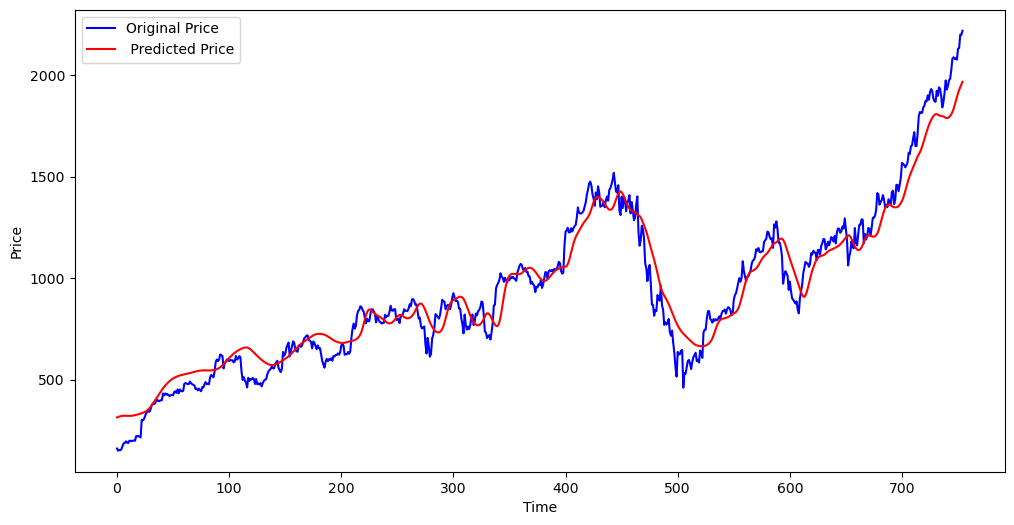

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label= ' Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show